## EfficientDet

EfficientDet (https://arxiv.org/abs/1911.09070) is the current state of the art for object detection. It is based on EfficientNet (backbone) and the implementation is available at https://github.com/google/automl/tree/master/efficientdet

In [1]:
import os
import sys
import numpy as np
import cv2
import tensorflow.compat.v1 as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Download source code if it doesn't exist.
if not os.path.exists('efficientdet_files'):
    !git clone --depth 1 https://github.com/google/automl
    os.rename('automl', 'efficientdet_files')
    sys.path.append('.')

In [2]:
os.chdir('efficientdet_files/efficientdet')

In [3]:
# Tensorflow models are trained with 90 ids and 80 classes (10 empty)
classes = {
    1: 'person', 2: 'bicycle', 3: 'car', 4: 'motorcycle', 5: 'airplane',
    6: 'bus', 7: 'train', 8: 'truck', 9: 'boat', 10: 'traffic light',
    11: 'fire hydrant', 13: 'stop sign', 14: 'parking meter', 15: 'bench',
    16: 'bird', 17: 'cat', 18: 'dog', 19: 'horse', 20: 'sheep', 21: 'cow',
    22: 'elephant', 23: 'bear', 24: 'zebra', 25: 'giraffe', 27: 'backpack',
    28: 'umbrella', 31: 'handbag', 32: 'tie', 33: 'suitcase', 34: 'frisbee',
    35: 'skis', 36: 'snowboard', 37: 'sports ball', 38: 'kite',
    39: 'baseball bat', 40: 'baseball glove', 41: 'skateboard', 42: 'surfboard',
    43: 'tennis racket', 44: 'bottle', 46: 'wine glass', 47: 'cup', 48: 'fork',
    49: 'knife', 50: 'spoon', 51: 'bowl', 52: 'banana', 53: 'apple',
    54: 'sandwich', 55: 'orange', 56: 'broccoli', 57: 'carrot', 58: 'hot dog',
    59: 'pizza', 60: 'donut', 61: 'cake', 62: 'chair', 63: 'couch',
    64: 'potted plant', 65: 'bed', 67: 'dining table', 70: 'toilet', 72: 'tv',
    73: 'laptop', 74: 'mouse', 75: 'remote', 76: 'keyboard', 77: 'cell phone',
    78: 'microwave', 79: 'oven', 80: 'toaster', 81: 'sink', 82: 'refrigerator',
    84: 'book', 85: 'clock', 86: 'vase', 87: 'scissors', 88: 'teddy bear',
    89: 'hair drier', 90: 'toothbrush',
}
COLORS = np.random.uniform(0, 255, size=(len(classes), 3))

## Download pretrained weights on  COCO

In [4]:
MODEL = 'efficientdet-d0'  #@param

In [9]:
# Download checkpoint.
#!wget https://storage.googleapis.com/cloud-tpu-checkpoints/efficientdet/coco/{MODEL}.tar.gz
#!tar zxf {MODEL}.tar.gz

--2020-05-04 14:44:46--  https://storage.googleapis.com/cloud-tpu-checkpoints/efficientdet/coco/efficientdet-d0.tar.gz
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.27.80, 2404:6800:4004:80c::2010
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.27.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28994253 (28M) [application/octet-stream]
Saving to: ‘efficientdet-d0.tar.gz’

efficientdet-d0.tar 100%[===================>]  27.65M  1.70MB/s    in 16s     

2020-05-04 14:45:03 (1.74 MB/s) - ‘efficientdet-d0.tar.gz’ saved [28994253/28994253]



In [5]:
ckpt_path = os.path.join(os.getcwd(), MODEL)
print('Use model in {}'.format(ckpt_path))

Use model in /app/artifacts/efficientdet_files/efficientdet/efficientdet-d0


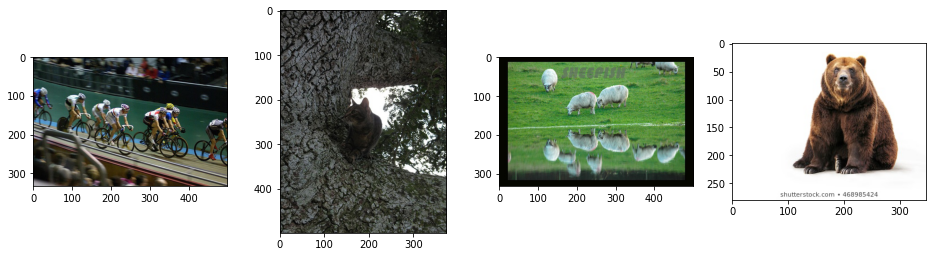

In [6]:
# show images
IMG_PATHS = [
    '../../images/img1.jpg',
    '../../images/img2.jpg',
    '../../images/img3.jpg',
    '../../images/img4.jpg',
]

plt.figure(figsize=(16, 9))

for img in IMG_PATHS:
    image = mpimg.imread(img)
    plt.subplot(2, 4, IMG_PATHS.index(img)+1)
    plt.imshow(image)

## Inference

In [7]:
import inference 
tf.reset_default_graph()

# Load inference model
net = inference.ServingDriver(MODEL, ckpt_path, batch_size=1, min_score_thresh=0.4, max_boxes_to_draw=200, line_thickness=2)
net.build()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
Use `tf.compat.v1.graph_util.tensor_shape_from_node_def_name`


Instructions for updating:
Use `tf.compat.v1.graph_util.tensor_shape_from_node_def_name`
3 ops no flops stats due to incomplete shapes.


Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.


Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.


Instructions for updating:
Please use `layer.__call__` method instead.


Instructions for updating:
Please use `layer.__call__` method instead.


Instructions for updating:
Use keras.layers.MaxPooling2D instead.


Instructions for updating:
Use keras.layers.MaxPooling2D instead.


Instructions for updating:
Use `tf.keras.layers.SeparableConv2D` instead.


Instructions for updating:
Use `tf.keras.layers.SeparableConv2D` instead.
3 ops no flops stats due to incomplete shapes.
3 ops no flops stats due to incomplete shapes.


Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.


Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.


INFO:tensorflow:Restoring parameters from /app/artifacts/efficientdet_files/efficientdet/efficientdet-d0/model


INFO:tensorflow:Restoring parameters from /app/artifacts/efficientdet_files/efficientdet/efficientdet-d0/model


{'image_files': <tf.Tensor 'image_files:0' shape=(None,) dtype=string>,
 'image_arrays': <tf.Tensor 'image_arrays:0' shape=(None, None, None, None) dtype=uint8>,
 'prediction': <tf.Tensor 'detections:0' shape=(1, None, 7) dtype=float32>}

In [8]:
import cv2 
import dataloader
import numpy as np 
from PIL import Image
    
def efficientdet_inference(img, model):
    
    # Define the input
    #input_img = np.array(Image.open(img))
    input_img = mpimg.imread(img)
    
    # Run inference
    if not net.sess:
        model.build()
    predictions = net.sess.run(net.signitures['prediction'],feed_dict={net.signitures['image_arrays']: [input_img]})

    
    # Get boxes, confidences and classes
    boxes = predictions[0][:, 1:5]
    classes = predictions[0][:, 6].astype(int)
    scores = predictions[0][:, 5]
    
    # convert [x, y, width, height]
    boxes[:, [0, 1, 2, 3]] = boxes[:, [1, 0, 3, 2]]
    
    return classes, scores, boxes

In [9]:
# Run inference on all images 
import time 

classes_id = []
confidences = [] 
boxes = []

start_time = time.time()
for img_path in IMG_PATHS:
    classe_id, confs, box = efficientdet_inference(img_path, net)
    boxes.append(box)
    confidences.append(confs)
    classes_id.append(classe_id)

print('inference time (on 4 images) in seconds: ', time.time() - start_time)

inference time (on 4 images) in seconds:  2.0887610912323


## Post-processing

In [10]:
# function to draw bounding box on the detected object with class name
def draw_bounding_box(img, class_id, confidence, box):
    # Loop over detected boxes
    for c_id, cfd, b in zip(class_id, confidence, box):
        label = str(classes[c_id])
        conf = '%.2f' % cfd
        # Get the label for the class name and its confidence
        text = '%s:%s' % (label, conf)

        color = COLORS[c_id]
        cv2.rectangle(img, b, color, 2)

        labelSize, baseLine = cv2.getTextSize(text, cv2.FONT_HERSHEY_PLAIN, 0.5, 1)
        top = max(b[1], labelSize[1])
        cv2.putText(img, text, (b[0], top), cv2.FONT_HERSHEY_PLAIN, 0.4, (255,255,255))

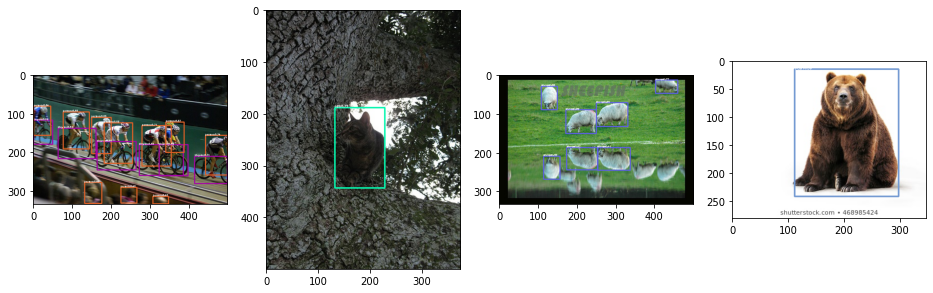

In [11]:
plt.figure(figsize=(16, 12))

for (img, classe, confidence, box)  in zip(IMG_PATHS, classes_id, confidences, boxes):
    image = mpimg.imread(img)
    draw_bounding_box(image, classe, confidence, box)
    plt.subplot(2, 4, IMG_PATHS.index(img)+1)
    plt.imshow(image)

In [12]:
for (img, classe, confidence)  in zip(IMG_PATHS, classes_id, confidences):
    print('#'*30)
    print('predictions on', img)
    for c_id, cfd in zip(classe, confidence):
        label = str(classes[c_id])
        conf = '%.2f' % cfd
        # Get the label for the class name and its confidence
        text = '%s:%s' % (label, conf)
        print(text)

##############################
predictions on ../../images/img1.jpg
person:0.74
bicycle:0.71
person:0.71
person:0.66
bicycle:0.66
person:0.65
bicycle:0.65
bicycle:0.62
person:0.60
bicycle:0.58
bicycle:0.58
person:0.57
person:0.54
person:0.46
person:0.46
person:0.40
##############################
predictions on ../../images/img2.jpg
cat:0.79
##############################
predictions on ../../images/img3.jpg
sheep:0.86
sheep:0.85
sheep:0.84
sheep:0.77
sheep:0.52
sheep:0.48
sheep:0.41
##############################
predictions on ../../images/img4.jpg
bear:0.93


In [ ]:
#Imad El Hanafi